In [100]:
import pandas as pd
import pylab as pl

#  os dados completos foram retirados de http://download.inep.gov.br/microdados/microdados_enem_2019.zip
#  os arquivo csv usado é uma amostra do arquivo completo.

#  fonte = "/content/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [101]:
dados.shape

(127380, 136)

In [102]:
dados['SG_UF_RESIDENCIA']

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [103]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [104]:
dados[['SG_UF_RESIDENCIA','Q025']]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [105]:
#  pegar todos os elementos encontrados na coluna
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [106]:
# conta quantos elementos sem repetição
len(dados['SG_UF_RESIDENCIA'].unique())

27

In [107]:
# conta quantas vezes cada elemento aparece, neste caso quantas pessoas por estado
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [108]:
# conta quantas vezes cada elemento aparece, neste caso quantas pessoas por idade
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [109]:
# conta quantas vezes cada elemento aparece, neste caso quantas pessoas por idade e ordena de forma crescente por idade
dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64



---


Desafio 01: Fazer a proporção de inscritos por idade.


Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.


---



In [110]:
# Desafio 01
((dados['NU_IDADE'].value_counts()/dados['NU_IDADE'].count())*100).sort_index()

13     0.003140
14     0.110692
15     1.577171
16     6.146962
17    16.687078
        ...    
73     0.001570
75     0.001570
76     0.000785
77     0.000785
82     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

In [111]:
# Desafio 02
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts()

SP    1
AP    1
MT    1
BA    1
Name: SG_UF_RESIDENCIA, dtype: int64

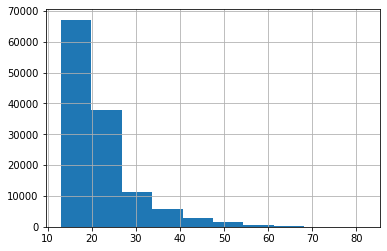

In [112]:
#  Visualização
dados['NU_IDADE'].hist()

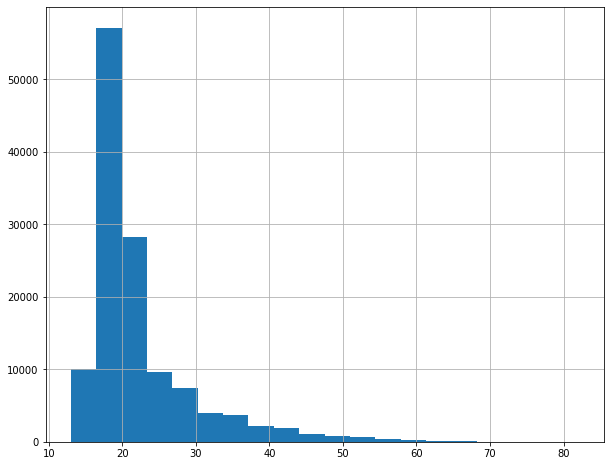

In [113]:
#  Visualização com aumento do range X e definição do tamanho da imagem
dados['NU_IDADE'].hist(bins = 20, figsize = (10,8))



---
Desafio 03: Colocar o título no gráfico


---




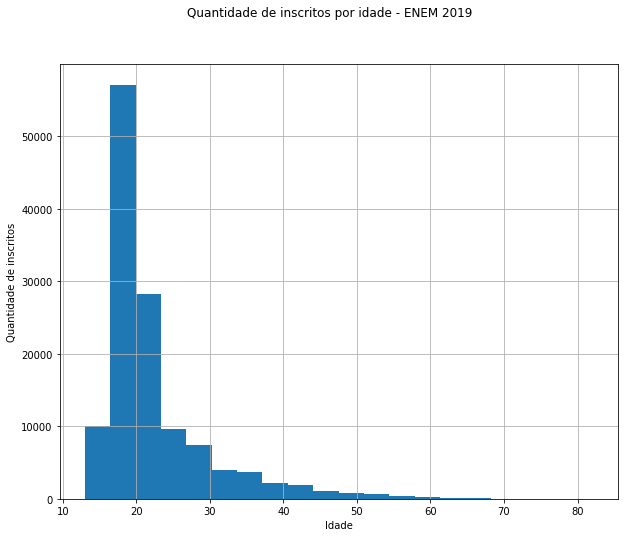

In [114]:
#  Desafio 03
pl.suptitle("Quantidade de inscritos por idade - ENEM 2019")
pl.xlabel('Idade')
pl.ylabel('Quantidade de inscritos')
dados['NU_IDADE'].hist(bins = 20, figsize = (10,8))

In [115]:
#  trabalhar com os treineiros
dados['IN_TREINEIRO']

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

In [116]:
#  faz uma consulta com a condição que a coluna IN_TREINEIRO == 1 (ou seja, quando os inscritos são treineiros)
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64



---
Desafio 04: Plotar os histogramas das idades dos treineiros e não treineiros


---




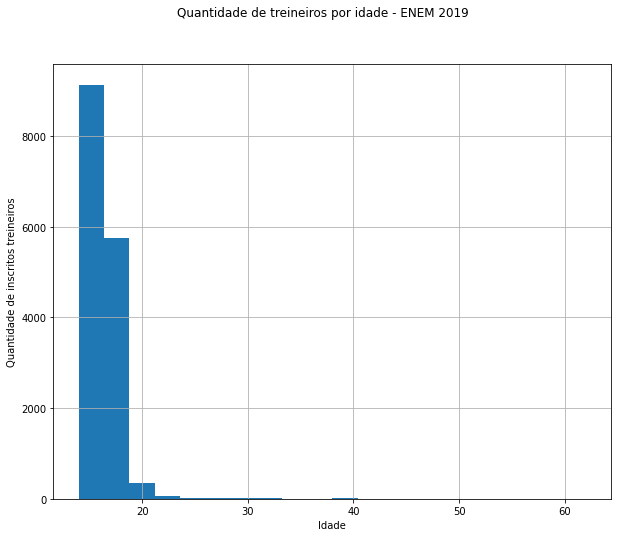

In [117]:
#  Desafio 04
pl.suptitle("Quantidade de treineiros por idade - ENEM 2019")
pl.xlabel('Idade')
pl.ylabel('Quantidade de inscritos treineiros')
dados.query("IN_TREINEIRO == 1")['NU_IDADE'].hist(bins = 20, figsize = (10,8))

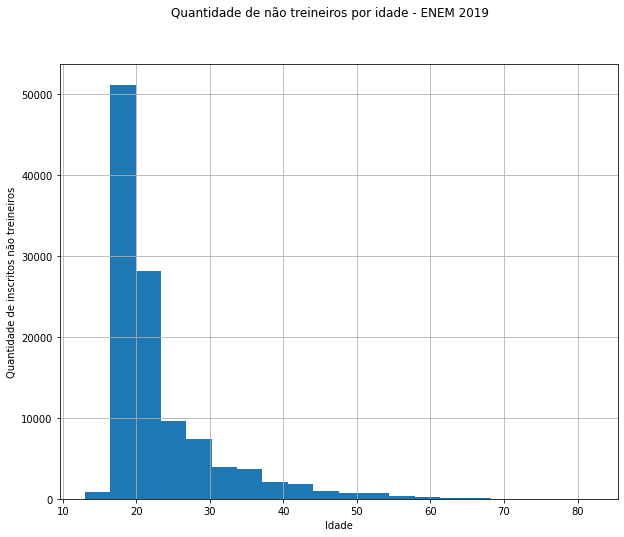

In [118]:
#  cont. Desafio 04
pl.suptitle("Quantidade de não treineiros por idade - ENEM 2019")
pl.xlabel('Idade')
pl.ylabel('Quantidade de inscritos não treineiros')
dados.query("IN_TREINEIRO == 0")['NU_IDADE'].hist(bins = 20, figsize = (10,8))

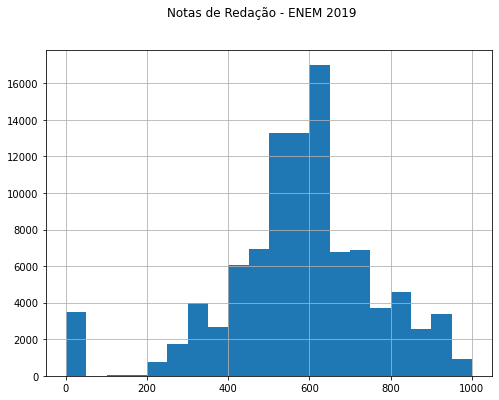

In [119]:
#  Histograma das notas de redação
pl.suptitle("Notas de Redação - ENEM 2019")
dados['NU_NOTA_REDACAO'].hist(bins = 20, figsize = (8, 6))

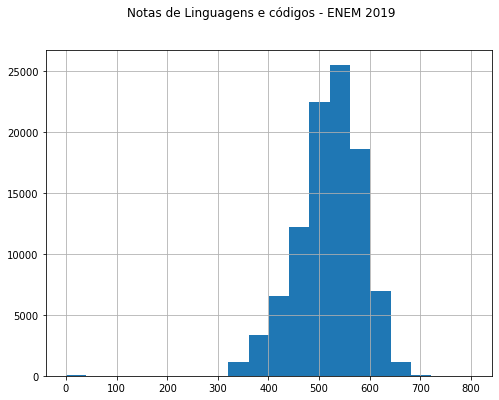

In [121]:
#  Histograma das notas de Linguagens e códigos
pl.suptitle("Notas de Linguagens e códigos - ENEM 2019")
dados['NU_NOTA_LC'].hist(bins = 20, figsize = (8, 6))

In [122]:
#  calcula a média do valor de uma coluna
pl.suptitle("Média das notas de Redação - ENEM 2019")
dados['NU_NOTA_REDACAO'].mean()

571.5700253970197

<Figure size 432x288 with 0 Axes>

In [123]:
#  calcula o desvio padrão de uma coluna
pl.suptitle("Desvio padrão das notas de Redação - ENEM 2019")
dados['NU_NOTA_REDACAO'].std()

188.07645455749753

<Figure size 432x288 with 0 Axes>

In [124]:
#  Variável (lista) para armazenar apenas os nomes das colunas que serão usadas para o describe
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

dados[provas].describe()


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [125]:
#  verifica a nota máximo dos 90% (0.9 do parâmetro) dos inscritos. Na verdade, o que se quer saber é qual o limite para os 10% com notas
#  mais altas.
dados["NU_NOTA_LC"].quantile(0.9)

596.3

In [126]:
#  verifica a nota dos 10% dos inscritos com nota mais baixa.
dados["NU_NOTA_LC"].quantile(0.1)

434.5

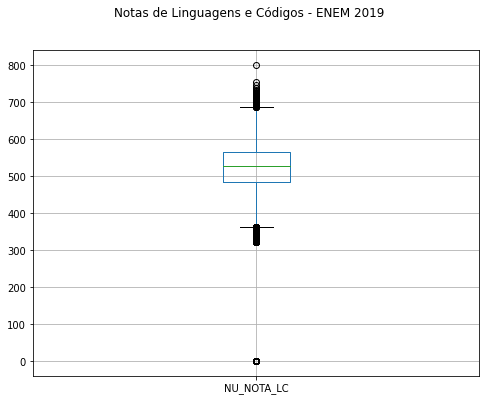

In [127]:
#  gráfico boxpot - diferenciar um valor único com base na média. 
#  A leitura do grafíco:
  #  A linha verde no retângulo é a mediana
  #  A maioria dos inscritos está com notas entre os 480 e 550 (retângulo no centro do gráfico)
  #  A bolinhas nos extremos são pessoas que tiraram as notas apontadas, mas que não estão entre a maioria
  #  os traços pretos são os quartis 25 e 75
pl.suptitle("Notas de Linguagens e Códigos - ENEM 2019")
dados["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))

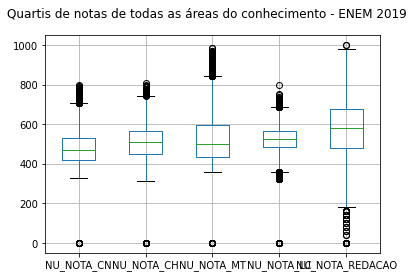

In [129]:
pl.suptitle("Quartis de notas de todas as áreas do conhecimento - ENEM 2019")
dados[provas].boxplot(grid = True, figsize = (10,8))



---
Desafio 05: Comparar as distribuições das provas de inglês (TP_LINGUA == 0) e de espanhol (TP_LINGUA == 1)

Desafio 06: Explorar a documentação do matplotlib e Pandas


---





In [130]:
# Desafio 05
# notas quando a língua estrangeira é o Inglês
dados.query("TP_LINGUA == 0")[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,46104.000000,48447.000000,46104.000000,48447.000000,48447.000000
mean,497.740194,528.271697,552.991077,537.679732,605.044688
std,79.823594,84.012277,117.326959,63.536275,186.388480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,434.100000,471.200000,455.500000,502.600000,520.000000
50%,496.900000,536.500000,540.100000,545.500000,600.000000
75%,557.400000,588.200000,638.700000,581.500000,720.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


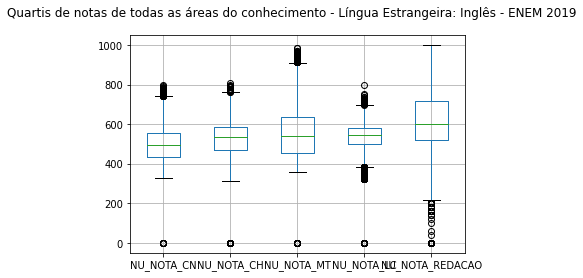

In [131]:
pl.suptitle("Quartis de notas de todas as áreas do conhecimento - Língua Estrangeira: Inglês - ENEM 2019")
dados.query("TP_LINGUA == 0")[provas].boxplot(grid = True, figsize = (10,8))

In [132]:
# cont. Desafio 05
# notas quando a língua estrangeira é o Espanhol
dados.query("TP_LINGUA == 1")[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,46654.000000,49596.000000,46654.000000,49596.000000,49596.000000
mean,458.420976,486.944455,494.466352,503.646965,538.870877
std,67.145864,76.623116,92.181696,61.016081,183.921283
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,407.300000,432.100000,422.600000,468.800000,460.000000
50%,450.400000,487.700000,474.300000,509.700000,560.000000
75%,503.900000,542.100000,551.000000,545.200000,640.000000
max,769.900000,760.400000,932.500000,718.400000,1000.000000


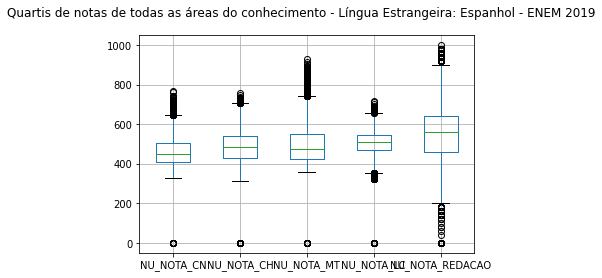

In [133]:
pl.suptitle("Quartis de notas de todas as áreas do conhecimento - Língua Estrangeira: Espanhol - ENEM 2019")
dados.query("TP_LINGUA == 1")[provas].boxplot(grid = True, figsize = (10,8))